In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np


In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:DML:0', device_type='DML'),
 PhysicalDevice(name='/physical_device:DML:1', device_type='DML')]

In [4]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_train[index])

In [6]:
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [7]:
x_train_scalled = x_train/255
x_test_scalled = x_test/255

In [8]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = "float32"
)
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = "float32"
)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(3000, activation = "relu"),
    keras.layers.Dense(1000, activation = "relu"),
    keras.layers.Dense(10, activation = "sigmoid")
])

model.compile(
    optimizer = "SGD",   #SGD = stochastic gradient descent
    loss = "categorical_crossentropy", #used when one hot encoded output is there, use sparse_categorical_crossentropy for discrete values
    metrics = ["accuracy"]
)

model.fit(x_train_scalled, y_train_categorical, epochs = 50)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 66s 1ms/sample - loss: 1.8560 - acc: 0.3356
Epoch 2/50
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.6571 - acc: 0.4132
Epoch 3/50
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.5687 - acc: 0.4455
Epoch 4/50
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.5036 - acc: 0.4700
Epoch 5/50
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.4561 - acc: 0.4860
Epoch 6/50
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.4134 - acc: 0.5013
Epoch 7/50
50000/50000 [==============================] - 62s 1ms/sample - loss: 1.3717 - acc: 0.5164
Epoch 8/50
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.3401 

In [11]:
np.argmax(model.predict(x_train_scalled)[0])

6

In [12]:
classes[y_train[0][0]]

'frog'

In [16]:
import matplotlib.pyplot as plt

In [17]:
def plot_sample_test(index):
    plt.figure(figsize = (10,1))
    plt.imshow(x_test[index])

In [14]:
classes[np.argmax(model.predict(x_test_scalled)[0])]

'cat'

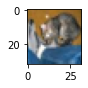

In [18]:
plot_sample_test(0)

In [19]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32,32,3)),
        keras.layers.Dense(3000, activation = "relu"),
        keras.layers.Dense(1000, activation = "relu"),
        keras.layers.Dense(10, activation = "sigmoid")
    ])

    model.compile(
        optimizer = "SGD",   #SGD = stochastic gradient descent
        loss = "categorical_crossentropy", #used when one hot encoded output is there, use sparse_categorical_crossentropy for discrete values
        metrics = ["accuracy"]
    )
    return model

In [21]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scalled, y_train_categorical, epochs = 1)

Train on 50000 samples
50000/50000 [==============================] - 86s 2ms/sample - loss: 1.8589 - acc: 0.3355
1min 26s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [22]:
%%timeit -n1 -r1
with tf.device('/DML:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scalled, y_train_categorical, epochs = 1)

Train on 50000 samples
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.8668 - acc: 0.3317
1min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [23]:
%%timeit -n1 -r1
with tf.device('/DML:1'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scalled, y_train_categorical, epochs = 1)

Train on 50000 samples
50000/50000 [==============================] - 103s 2ms/sample - loss: 1.8585 - acc: 0.3348
1min 44s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [24]:
%%timeit -n1 -r1
with tf.device('/DML:0'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scalled, y_train_categorical, epochs = 1)

Train on 50000 samples
50000/50000 [==============================] - 63s 1ms/sample - loss: 1.8651 - acc: 0.3326
1min 5s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%%timeit -n1 -r1
with tf.device('/DML:1'):
    cpu_model = get_model()
    cpu_model.fit(x_train_scalled, y_train_categorical, epochs = 1)

Train on 50000 samples
50000/50000 [==============================] - 88s 2ms/sample - loss: 1.8635 - acc: 0.33470s - loss: 1.8635 - acc: 0
1min 28s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [26]:
tf.config.list_physical_devices(
    device_type=None
)

AttributeError: module 'tensorflow._api.v1.config' has no attribute 'list_physical_devices'

In [29]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:DML:0', device_type='DML'),
 PhysicalDevice(name='/physical_device:DML:1', device_type='DML')]